In [5]:
!pip install mkl-service

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.0 MB/s eta 0:00:00


In [4]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 MB 8.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 30.7 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 33.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [40]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from torchvision.io import read_image
from torchvision import transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

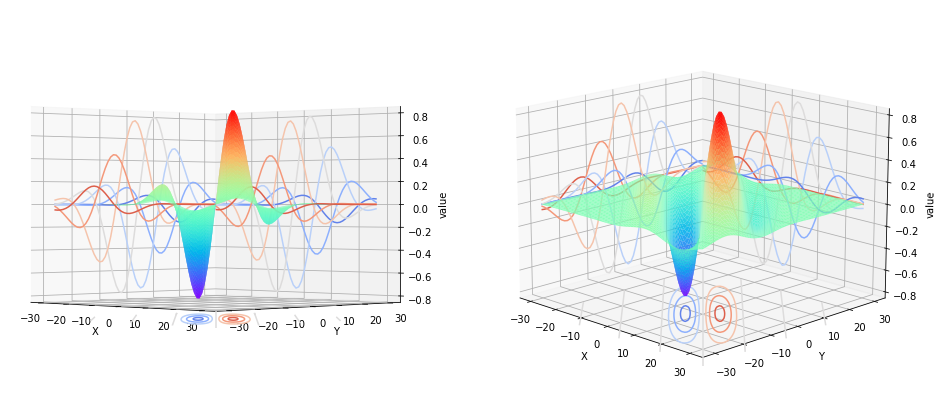

In [9]:
'''
X=np.arange(-2,2,0.01)  #范围是[-4,4],步长为0.25,生成一个数组
Y=np.arange(-2,2,0.01)
X,Y=np.meshgrid(X,Y)    #生成绘制3D图形所需要的网格数据
R=np.sqrt(X**2+Y**2)
Z=np.sin(R)'''

from torchvision.io import read_image
from torchvision import transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
kszie = 31
sigma = 8
theta = np.pi/4
def calc_lambda(sigma, bandwidth):
    p = 2**bandwidth
    c = np.sqrt(np.log(2)/2)
    return sigma * np.pi / c  * (p - 1) / (p + 1)
b=1.6
Lambda = calc_lambda(sigma,b)
gamma = 0.5
phi = np.pi/2
kb=cv2.getGaborKernel((31, 31), sigma, theta, Lambda, gamma,phi, ktype=cv2.CV_32F)
kb.shape
X=np.arange(-30,31,1)
Y=np.arange(-30,31,1)
X,Y=np.meshgrid(X,Y)
Z=cv2.getGaborKernel((60, 60), sigma, theta, Lambda, gamma,phi, ktype=cv2.CV_32F)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow', alpha=0.9)
cset = ax.contour(X, Y, Z ,zdir='z', offset=-1, alpha=1,cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z ,zdir='x', offset=-30, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z ,zdir='y', offset=30, cmap=matplotlib.cm.coolwarm)
ax.set_zlabel("value")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.view_init(15, -45)
#ax.set_xlim3d(-np.pi, 2*np.pi)
#ax.set_ylim3d(, 3*np.pi)
#ax.set_zlim3d(-np.pi, 2*np.pi)
Z1=cv2.getGaborKernel((60, 60), sigma, theta, Lambda, gamma,phi, ktype=cv2.CV_32F)
ax1=fig.add_subplot(1,2,1,projection="3d")
sur=ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow', alpha=0.95)
cset = ax1.contour(X, Y, Z ,zdir='z', offset=-1, alpha=1,cmap=matplotlib.cm.coolwarm)
cset = ax1.contour(X, Y, Z ,zdir='x', offset=-30, cmap=matplotlib.cm.coolwarm)
cset = ax1.contour(X, Y, Z ,zdir='y', offset=30, cmap=matplotlib.cm.coolwarm)
ax1.set_zlabel("value")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.view_init(0, -45)
#fig.colorbar(sur,shrink=0.3)
plt.show()

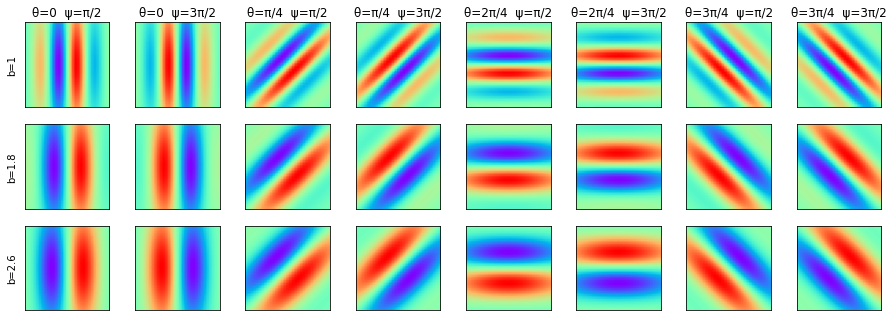

In [11]:
sigmalist=[8]
gammalist=[0.5]
blist=[1,1.8,2.6]
thetalist=[0,np.pi/4, 2*np.pi/4, 3*np.pi/4]
philist=[np.pi/2, 3*np.pi/2]
def calc_lambda(sigma, bandwidth):
    p = 2**bandwidth
    c = np.sqrt(np.log(2)/2)
    return sigma * np.pi / c  * (p - 1) / (p + 1)
tl=[str(0), chr(960)+"/4", "2"+chr(960)+"/4","3"+chr(960)+"/4"]
pl=[chr(960)+"/2","3"+chr(960)+"/2"]
picsave=[]

fig=plt.figure()

plt.subplots_adjust(0, 0, 2, 1)

od=0
op=0
i=0
for b in blist:
    j=0
    op=0
    for theta in thetalist:
        for phi in philist:
            plt.subplot2grid((3, 8), (i, j))
            Lambda=calc_lambda(sigmalist[0],b)
            kernel= cv2.getGaborKernel((31,31), sigmalist[0], theta, Lambda, gammalist[0], phi)
            plt.xticks([])
            plt.yticks([])
            if od==0:
                plt.title(chr(952)+"="+tl[j//2]+"  "+chr(968)+"="+pl[j%2])
            if op==0:
                plt.ylabel("b="+str(b))
                op+=1
            plt.imshow(kernel,cmap="rainbow")
            #plt.colorbar()
            j+=1
    i+=1
    od+=1
#fig.colorbar()
plt.show()


### Parameter sigma and bandwidth
The bandwidth or sigma controls the overall size of the Gabor envelope. For larger bandwidth the envelope increase allowing more stripes and with small bandwidth the envelope tightens. On increasing the sigma to 30 and 45, the number of stripes in the Gabor function increases.

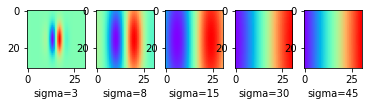

In [25]:
j=0
for i in sigmalist:
    plt.subplot2grid((1, 5), (0, j))
    Lambda=calc_lambda(i,1.8)
    kernel= cv2.getGaborKernel((31,31), i, 0, Lambda, 0.5, np.pi/2)
    plt.imshow(kernel,cmap="rainbow")
    plt.xlabel("sigma="+str(i))
    j+=1


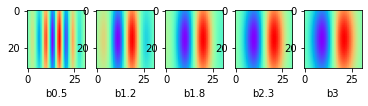

In [27]:
sigmalist=[8]
gammalist=[0.5]
blist=[1,1.8,2.6]
thetalist=[0,np.pi/4, 2*np.pi/4, 3*np.pi/4]
philist=[np.pi/2, 3*np.pi/2]

j=0
blist=[0.5,1.2,1.8,2.3,3]
for i in blist:
    plt.subplot2grid((1, 5), (0, j))
    Lambda=calc_lambda(8,i)
    kernel= cv2.getGaborKernel((31,31), 8, 0, Lambda, 0.5, np.pi/2)
    plt.imshow(kernel,cmap="rainbow")
    plt.xlabel("b"+str(i))
    j+=1

### Parameter gamma
The aspect ratio or gamma controls the height of the Gabor function. For very high aspect ratio the height becomes very small and for very small gamma value the height becomes quite large. On increasing the value of gamma to 0.5 and 0.75, keeping other parameters unchanged, the height of the Gabor function reduces.



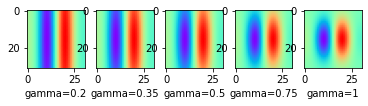

In [30]:
j=0
gammalist=[0.2,0.35,0.5,0.75,1]
for i in gammalist:
    plt.subplot2grid((1, 5), (0, j))
    Lambda=calc_lambda(8,1.8)
    kernel= cv2.getGaborKernel((31,31), 8, 0, Lambda, i, np.pi/2)
    plt.imshow(kernel,cmap="rainbow")
    plt.xlabel("gamma="+str(i))
    j+=1

### Parameter theta
The theta controls the orientation of the Gabor function. The zero degree theta corresponds to the vertical position of the Gabor function.

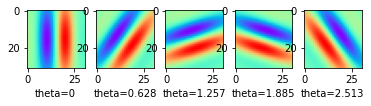

In [38]:
j=0
thetalist=[0,1/5*np.pi,2/5*np.pi,3/5*np.pi,4/5*np.pi]
for i in thetalist:
    plt.subplot2grid((1, 5), (0, j))
    Lambda=calc_lambda(8,1.8)
    kernel= cv2.getGaborKernel((31,31), 8, i, Lambda, 0.5, np.pi/2)
    plt.imshow(kernel,cmap="rainbow")
    plt.xlabel("theta="+str(round(i,3)))
    j+=1


### parameter phi
The phase offset of the sinusoidal function.

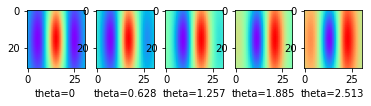

In [39]:
j=0
philist=[0,1/5*np.pi,2/5*np.pi,3/5*np.pi,4/5*np.pi]
for i in philist:
    plt.subplot2grid((1, 5), (0, j))
    Lambda=calc_lambda(8,1.8)
    kernel= cv2.getGaborKernel((31,31), 8, 0, Lambda, 0.5, i)
    plt.imshow(kernel,cmap="rainbow")
    plt.xlabel("phi="+str(round(i,3)))
    j+=1